**Exploratory Data Analysis of Air Quality & Weather Data (Delhi, 2025)**

-Conducted end-to-end EDA including univariate, bivariate, and multivariate analysis

-Identified season-dependent AQI drivers and quantified pollutant contributions using regression

-Demonstrated dominance of PM10 in pre-monsoon AQI peaks after controlling for weather variables

-Visualized trends and anomalies to derive data-backed environmental insights

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('delhi-weather-aqi-2025.csv')
df.head()

,date_ist,time_ist,location,lat,lon,temp_c,humidity,pressure_mb,windspeed_kph,condition_text,description,aqi_index,pm2_5,pm10,co,no2
0,01/01/2025,0:00,Anand Vihar,28.6469,77.316,8.1,100,995.4,2.9,Mainly clear,WMO Code 1,197,185.8,188.6,1907,56.7
1,01/01/2025,1:00,Anand Vihar,28.6469,77.316,7.7,100,994.7,3.2,Overcast,WMO Code 3,198,174.6,177.4,1669,44.8
2,01/01/2025,2:00,Anand Vihar,28.6469,77.316,7.5,100,994.3,4.5,Overcast,WMO Code 3,199,164.4,166.7,1493,34.6
3,01/01/2025,3:00,Anand Vihar,28.6469,77.316,7.8,99,994.1,6.0,Overcast,WMO Code 3,200,156.5,158.8,1401,26.7
4,01/01/2025,4:00,Anand Vihar,28.6469,77.316,7.3,100,993.8,6.8,Overcast,WMO Code 3,200,149.5,151.8,1372,20.6


**These are some of the questions I would be addressing:-**

How does AQI vary over time (daily, monthly, seasonally)?

Which pollutants drive AQI spikes the most?

Are there predictable patterns (winter smog, post-monsoon dips)?

How often does AQI cross health-critical thresholds?

Are there anomalous days (Diwali, dust storms, lockdown-like drops)?

**Data Sanity Check and Cleaning**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_ist        52560 non-null  object 
 1   time_ist        52560 non-null  object 
 2   location        52560 non-null  object 
 3   lat             52560 non-null  float64
 4   lon             52560 non-null  float64
 5   temp_c          52560 non-null  float64
 6   humidity        52560 non-null  int64  
 7   pressure_mb     52560 non-null  float64
 8   windspeed_kph   52560 non-null  float64
 9   condition_text  52560 non-null  object 
 10  description     52560 non-null  object 
 11  aqi_index       52560 non-null  int64  
 12  pm2_5           52560 non-null  float64
 13  pm10            52560 non-null  float64
 14  co              52560 non-null  int64  
 15  no2             52560 non-null  float64
dtypes: float64(8), int64(3), object(5)
memory usage: 6.4+ MB


In [5]:
df['date_ist']=pd.to_datetime(df['date_ist'], dayfirst=True)
df['time_ist']=pd.to_datetime(df['time_ist'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date_ist        52560 non-null  datetime64[ns]
 1   time_ist        52560 non-null  datetime64[ns]
 2   location        52560 non-null  object        
 3   lat             52560 non-null  float64       
 4   lon             52560 non-null  float64       
 5   temp_c          52560 non-null  float64       
 6   humidity        52560 non-null  int64         
 7   pressure_mb     52560 non-null  float64       
 8   windspeed_kph   52560 non-null  float64       
 9   condition_text  52560 non-null  object        
 10  description     52560 non-null  object        
 11  aqi_index       52560 non-null  int64         
 12  pm2_5           52560 non-null  float64       
 13  pm10            52560 non-null  float64       
 14  co              52560 non-null  int64         
 15  no

C:\Users\Kushagra pant\AppData\Local\Temp\ipykernel_37816\2991358511.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time_ist']=pd.to_datetime(df['time_ist'])


In [6]:
print(df.isnull().sum())

date_ist          0
time_ist          0
location          0
lat               0
lon               0
temp_c            0
humidity          0
pressure_mb       0
windspeed_kph     0
condition_text    0
description       0
aqi_index         0
pm2_5             0
pm10              0
co                0
no2               0
dtype: int64


In [7]:
print(df.duplicated().sum())

0


In [8]:
print(df['temp_c'].unique())

[ 8.1  7.7  7.5  7.8  7.3  7.6  8.   8.4  9.4 11.3 13.1 14.6 15.8 16.5
 16.9 14.9 12.2 11.4 10.9 10.4 10.1  9.6  8.2  7.9  8.6  9.3 11.  14.7
 15.9 16.7 17.  14.8 12.4 11.6 11.1 10.3  9.1  7.2  7.  10.6 12.9 16.6
 16.8 16.2 14.5 12.1 10.2  9.9  7.4  8.8  9.7 13.6 16.  11.5 11.2 10.8
  6.9  7.1 13.2 15.1 11.8  8.9  8.7  8.5 13.4 17.6 18.3 18.4 17.9 11.9
 10.5  8.3  9.8 13.3 18.2 17.8 13.7 12.5 15.  18.1 17.5 15.7  9.5 13.9
 18.  18.5 13.5 12.8 12.3  9.  19.  19.2 18.7 14.4 12.7  9.2 11.7 14.2
 19.1 19.5 12.6 18.6 19.4 19.7 18.9 14.  16.3 20.1 16.4 10.7 10.  18.8
 19.9 17.1 14.3 13.8 13.  15.6 19.8 20.6 20.9 21.4 22.  21.1 14.1 20.2
 20.5 12.  20.8 20.3 16.1 17.7 17.2 15.4 15.2 17.4 15.3  6.7  6.8  6.6
  6.2  5.7 17.3 15.5 20.  21.  21.2 21.3 21.6 22.2 21.5 21.7 21.8 22.1
 21.9 20.4 19.3 22.6 23.1 23.  22.5 22.7 22.4 22.3 23.4 22.8 19.6 20.7
  6.4 23.2 23.3  6.5 23.5 23.9 23.6 24.  24.5 24.2 22.9 23.7 25.  25.1
 24.6 25.2 25.4 24.9 24.3 23.8 25.7 26.5 25.9 26.  25.3 24.8 25.8 24.4
 25.5 

In [9]:
stats = df[['temp_c', 'humidity', 'aqi_index', 'pm2_5', 'windspeed_kph']].describe()
print(stats)

             temp_c      humidity     aqi_index         pm2_5  windspeed_kph
count  52560.000000  52560.000000  52560.000000  52560.000000   52560.000000
mean      25.024406     62.285940    287.364212     89.542432       6.565820
std        7.618231     23.454666    327.979524     55.363812       3.478066
min        5.700000      5.000000     56.000000      6.000000       0.000000
25%       19.500000     44.000000    152.000000     51.100000       4.000000
50%       26.500000     65.000000    170.000000     76.400000       6.000000
75%       30.500000     82.000000    238.000000    110.400000       8.700000
max       43.800000    100.000000   2742.000000    443.300000      27.100000


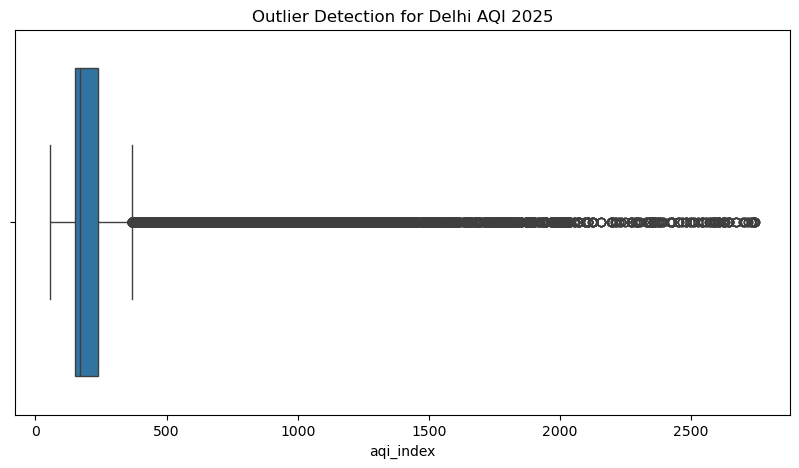

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['aqi_index'])
plt.title('Outlier Detection for Delhi AQI 2025')
plt.show()

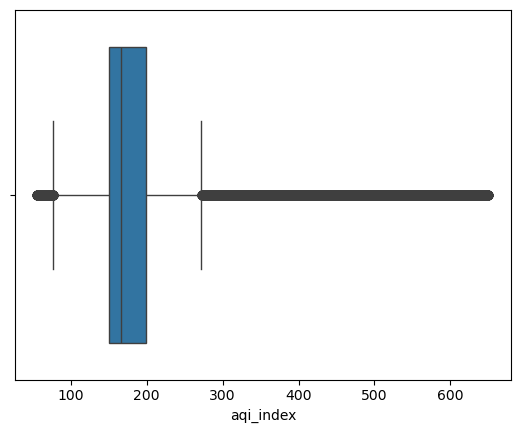

In [11]:

df= df[df['aqi_index'] <= 650]
sns.boxplot(x=df['aqi_index'])
plt.show()

**Univariate Analysis**


In [12]:
df['aqi_index'].describe

<bound method NDFrame.describe of 0        197
1        198
2        199
3        200
4        200
        ... 
52555    209
52556    209
52557    209
52558    209
52559    208
Name: aqi_index, Length: 47505, dtype: int64>

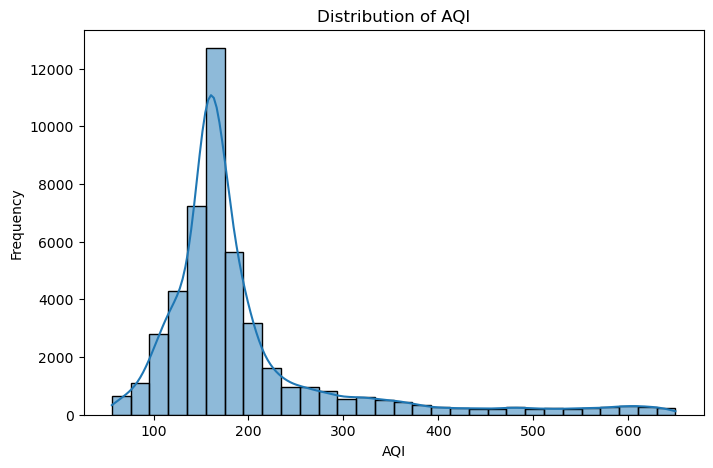

In [13]:
#Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['aqi_index'], kde=True, bins=30)
plt.title("Distribution of AQI")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()

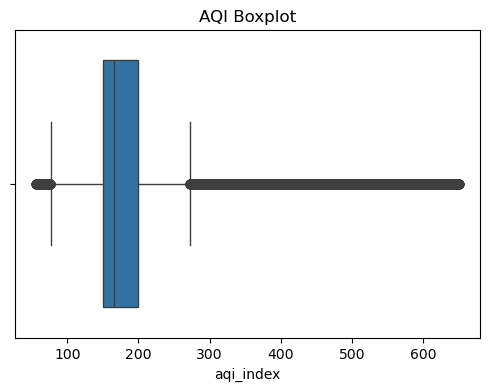

In [14]:
#Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df['aqi_index'])
plt.title("AQI Boxplot")
plt.show()

In [15]:
def aqi_category(aqi):
    if aqi <= 50: return 'Good'
    elif aqi <= 100: return 'Satisfactory'
    elif aqi <= 200: return 'Moderate'
    elif aqi <= 300: return 'Poor'
    elif aqi <= 400: return 'Very Poor'
    else: return 'Severe'

df['AQI_Category'] = df['aqi_index'].apply(aqi_category)


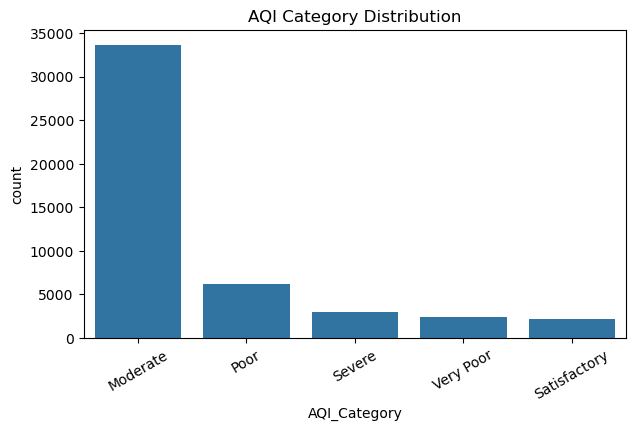

In [16]:
df['AQI_Category'].value_counts(normalize=True) * 100
plt.figure(figsize=(7,4))
sns.countplot(x='AQI_Category', data=df,
              order=df['AQI_Category'].value_counts().index)
plt.title("AQI Category Distribution")
plt.xticks(rotation=30)
plt.show()


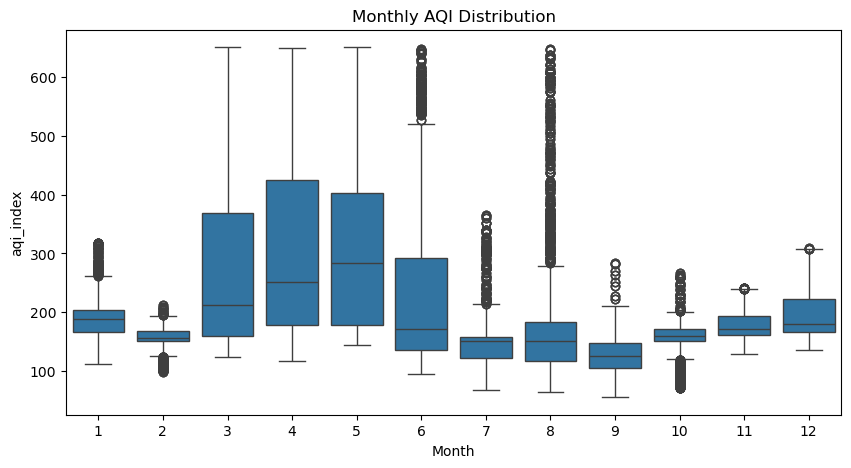

In [17]:
df['Month'] = df['date_ist'].dt.month

plt.figure(figsize=(10,5))
sns.boxplot(x='Month', y='aqi_index', data=df)
plt.title("Monthly AQI Distribution")
plt.show()

**Interpretation**

Majority of days fall into Moderate–Poor categories.
A non-trivial percentage of days fall under Very Poor or Severe, posing serious health risks.

Clean-air days are the exception, not the norm.

There is a clear spike in median AQI during the summer months. Summers show higher median AQI as well as a wider range. Although the Monsoon supresses this pollution, the pollution rises again during the winters.

-January–February are NOT the worst months here

-Medians are lower than expected

-Variability is limited compared to summer months

The dataset contradicts the common assumption that winter months always show the highest AQI.

That’s a valuable insight.

Overall, seasonality is a dominant univariate signal, with maximum pollution risk occurring before the onset of the monsoon rather than in peak winter.

**Pollutant analysis**

In [18]:
pollutants = ['pm2_5','pm10','no2','co']
df[pollutants].describe()


,pm2_5,pm10,no2,co
count,47505.000000,47505.000000,47505.000000,47505.000000
mean,82.285286,205.013704,36.912308,896.399579
std,48.499964,214.675314,29.466227,615.339637
min,6.000000,6.100000,1.700000,146.000000
25%,48.800000,75.400000,15.900000,478.000000
50%,71.700000,134.600000,28.400000,696.000000
75%,101.700000,244.900000,48.900000,1127.000000
max,369.700000,2563.000000,220.100000,7432.000000


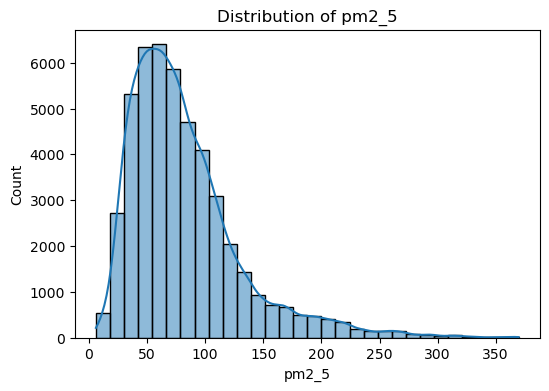

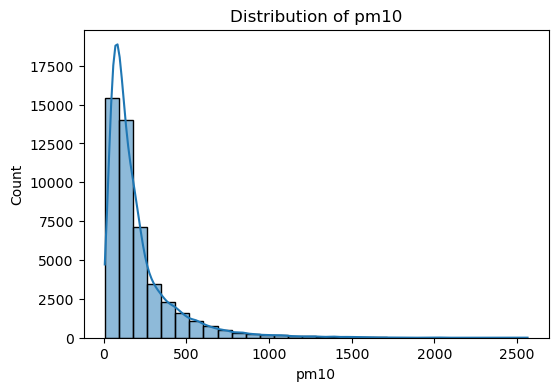

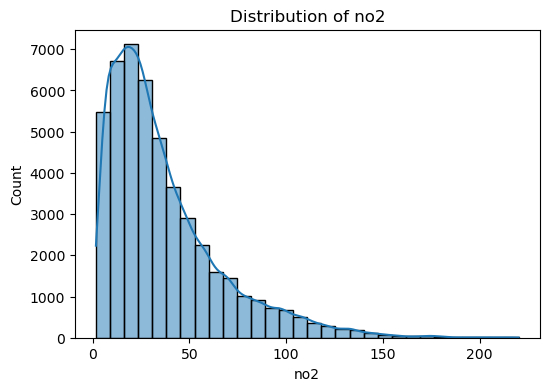

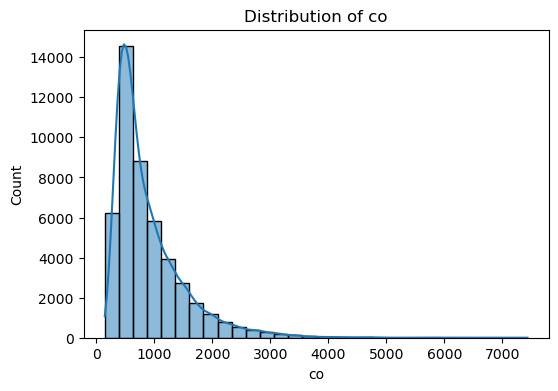

In [19]:
for col in pollutants:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

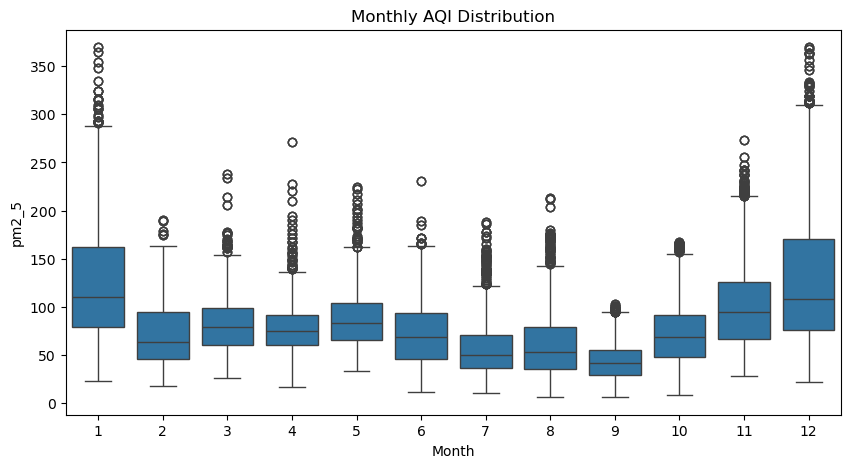

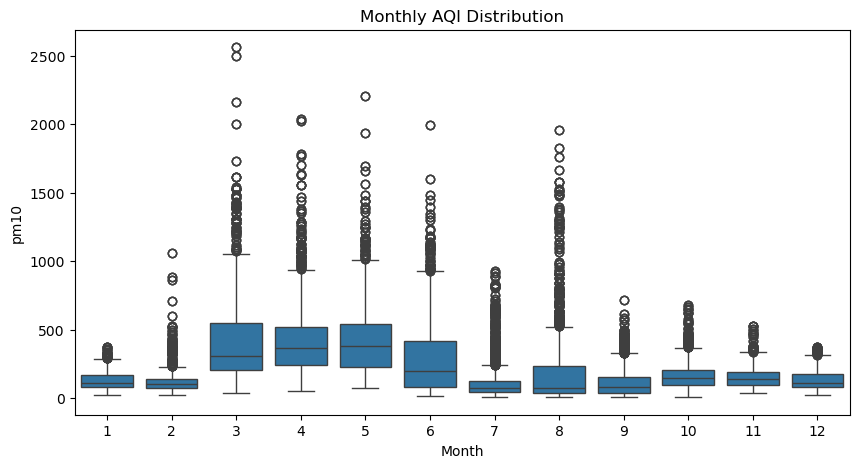

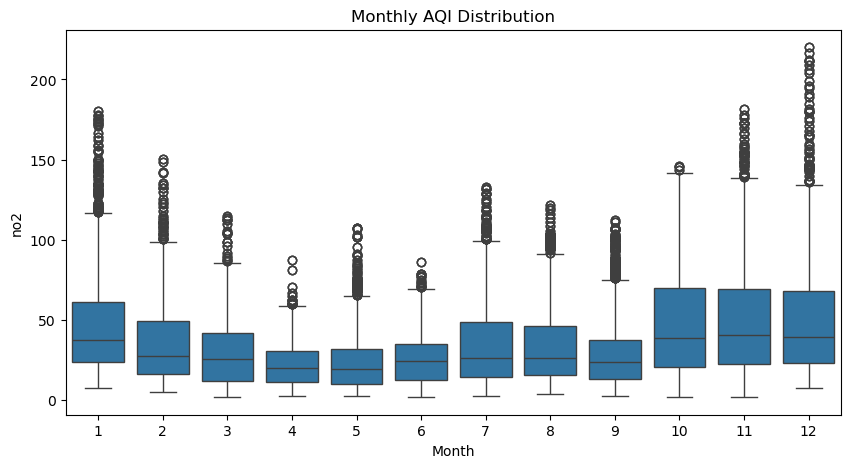

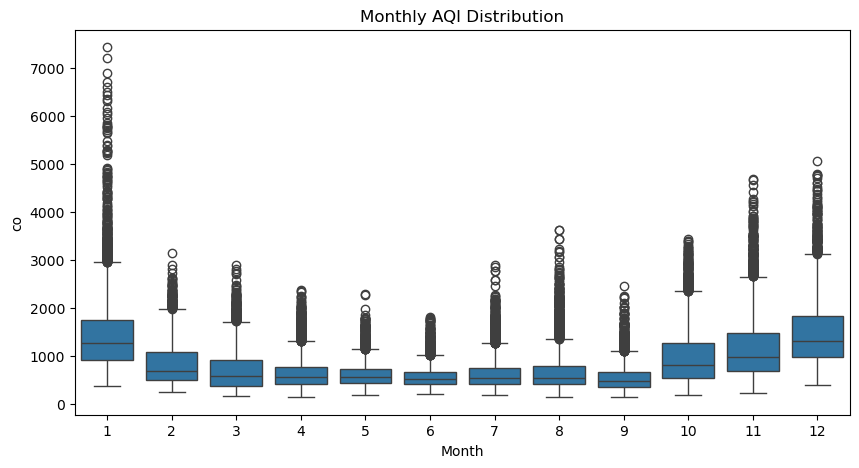

In [20]:
df['Month'] = df['date_ist'].dt.month
for col in pollutants:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='Month', y=df[col], data=df)
    plt.title("Monthly AQI Distribution")
    plt.show()



This shows that PM 2.5, NO2 and CO all show a rise during winters, while PM 10 shows it during summers and pre-monsoon.

At the same time, the AQI analysis shows that overall AQI levels peak during the pre-monsoon months, rather than during winter. This divergence suggests that the drivers of poor air quality vary by season.

Two plausible inferences arise from this observation:

PM10 may exert a disproportionately strong influence on AQI during the pre-monsoon period, outweighing the contribution of PM2.5 and gaseous pollutants despite their wintertime elevation.

Alternatively, pre-monsoon pollution episodes may be driven by factors not fully captured by PM2.5, NO₂, and CO alone, such as large-scale dust events, changes in pollutant composition, or meteorological conditions that amplify the impact of coarse particulates.

In [21]:
df.head()

,date_ist,time_ist,location,lat,lon,temp_c,humidity,pressure_mb,windspeed_kph,condition_text,description,aqi_index,pm2_5,pm10,co,no2,AQI_Category,Month
0,2025-01-01,2026-01-20 00:00:00,Anand Vihar,28.6469,77.316,8.1,100,995.4,2.9,Mainly clear,WMO Code 1,197,185.8,188.6,1907,56.7,Moderate,1
1,2025-01-01,2026-01-20 01:00:00,Anand Vihar,28.6469,77.316,7.7,100,994.7,3.2,Overcast,WMO Code 3,198,174.6,177.4,1669,44.8,Moderate,1
2,2025-01-01,2026-01-20 02:00:00,Anand Vihar,28.6469,77.316,7.5,100,994.3,4.5,Overcast,WMO Code 3,199,164.4,166.7,1493,34.6,Moderate,1
3,2025-01-01,2026-01-20 03:00:00,Anand Vihar,28.6469,77.316,7.8,99,994.1,6.0,Overcast,WMO Code 3,200,156.5,158.8,1401,26.7,Moderate,1
4,2025-01-01,2026-01-20 04:00:00,Anand Vihar,28.6469,77.316,7.3,100,993.8,6.8,Overcast,WMO Code 3,200,149.5,151.8,1372,20.6,Moderate,1


**Multivariate Correlation Analysis**

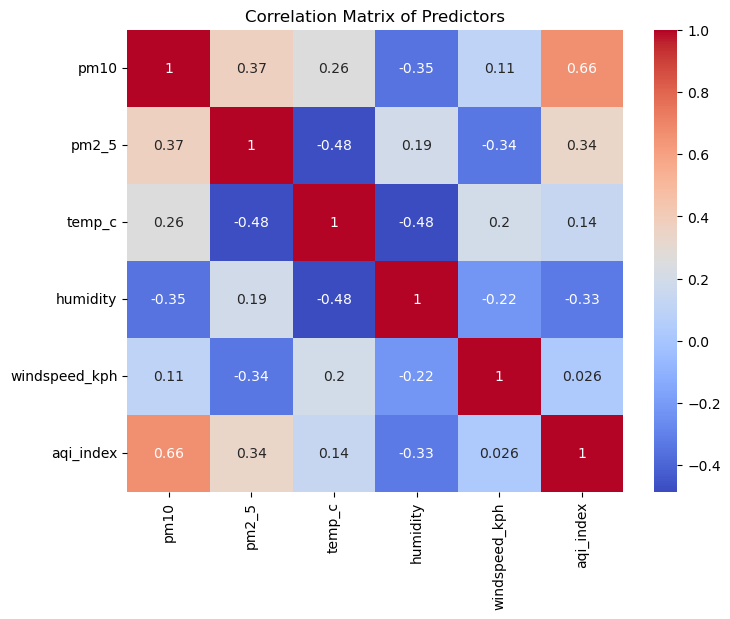

In [25]:
features = ['pm10', 'pm2_5', 'temp_c', 'humidity', 'windspeed_kph','aqi_index']
corr_matrix = df[features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Predictors")
plt.show()


The correlation matrix reveals that AQI is most strongly associated with PM10 (r = 0.66), indicating the dominant role of coarse particulate matter in driving air quality degradation during the study period, as speculated earlier. PM2.5 shows a weaker but still meaningful association (r = 0.34), while meteorological variables primarily modulate pollution intensity rather than acting as direct drivers. Temperature and humidity exhibit strong inverse relationships with particulate concentrations, highlighting a seasonal transition in pollution mechanisms—from fine particulates during cooler, humid conditions to dust-driven pollution under hot, dry pre-monsoon conditions. These findings explain the observed pre-monsoon AQI peak and justify the inclusion of both particulate and meteorological variables in multivariate modeling.

**Ending with**

**Extreme vs Normal Day Analysis: Pollutant Composition**

In [30]:
q90 = df['aqi_index'].quantile(0.9)
df['is_extreme'] = df['aqi_index'] >= q90
df.groupby('is_extreme')[['pm10','pm2_5','no2','co']].mean()


,pm10,pm2_5,no2,co
is_extreme,,,,
False,163.059227,80.489364,38.255722,926.958225
True,578.277438,98.263375,24.960125,624.523125


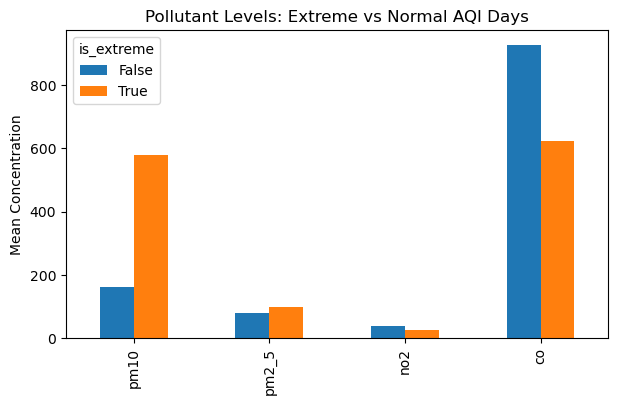

In [31]:
df.groupby('is_extreme')[['pm10','pm2_5','no2','co']].mean().T.plot(
    kind='bar', figsize=(7,4)
)
plt.ylabel("Mean Concentration")
plt.title("Pollutant Levels: Extreme vs Normal AQI Days")
plt.show()

Extreme AQI days exhibit a disproportionate increase in PM10 compared to PM2.5 and gaseous pollutants, indicating that severe pollution episodes are driven by changes in pollutant composition rather than uniform scaling of all pollutants.